<a href="https://colab.research.google.com/github/PSivaMallikarjun/Airline-Passenger-Time-Series-Prediction-using-Keras-LSTM-Deep-Learning-/blob/main/Airline_Passenger(Time_Series)_Prediction_using_Keras_LSTM_(Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Airline Passenger(Time Series) Prediction using Keras LSTM (Deep Learning)


We will use the Airline Passenger dataset for this project. This dataset provides the monthly total passenger numbers of a US airline from 1949 to 1960. We will produce a solution for this project by using the LSTM model available in Keras, and you will see a good example of how to solve Time Series problems with Deep Learning in general.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0166
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0059
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0058
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0053
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0072
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077
Epoch 16/50
85/8

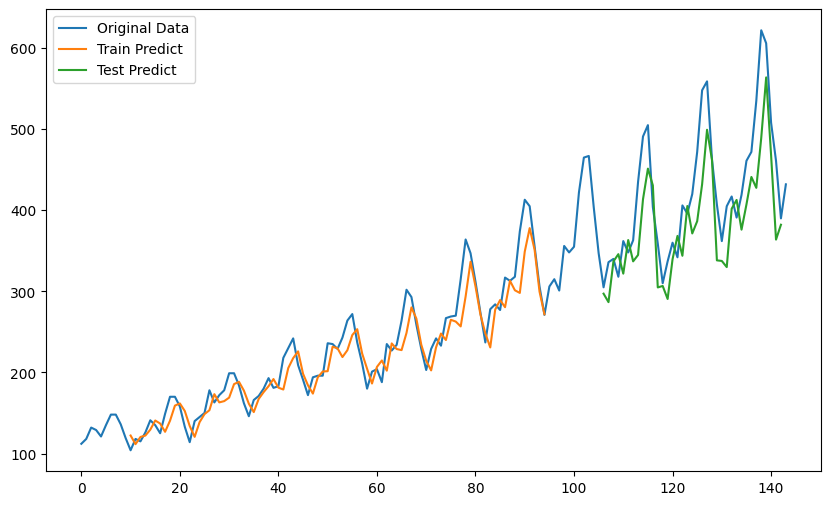

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(data_url, usecols=[1], engine='python')

df = df.values.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split into train and test sets
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
train, test = df[0:train_size, :], df[train_size:len(df), :]

look_back = 10
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=50)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_score = sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f'Train RMSE: {train_score:.2f}, Test RMSE: {test_score:.2f}')

# Plot results
df_plot = pd.read_csv(data_url, usecols=[1], engine='python')
df_plot = df_plot.values.astype('float32')

train_plot = np.empty_like(df_plot)
test_plot = np.empty_like(df_plot)
train_plot[:, :] = np.nan
test_plot[:, :] = np.nan

train_plot[look_back:len(train_predict) + look_back, :] = train_predict
test_plot[len(train_predict) + (look_back * 2) + 1:len(df_plot) - 1, :] = test_predict

plt.figure(figsize=(10, 6))
plt.plot(df_plot, label='Original Data')
plt.plot(train_plot, label='Train Predict')
plt.plot(test_plot, label='Test Predict')
plt.legend()
plt.show()
